### Homework 2

#### Import the libraries we'll need

In [1]:
import matplotlib.pyplot as plt # import matplotlib with shorter name
import pandas as pd # import pandas with shorter name
import datetime

#### We're going to import the wind dataset we used in class. The dataset contains daily average wind speeds for 1961-1978 from 12 meteorological stations in the Republic of Ireland (Haslett and Raftery 1989).

#### Each line corresponds to one day of data in the following format: year, month, day, average wind speed at each of the stations. Station names are abbreviated as RPT, VAL, ROS, KIL, SHA, BIR, DUB, CLA, MUL, CLO, BEL, and MAL

#### The data are in knots, not in m/s.

#### The original data file has three columns Year, Month, Day for time. We're going to use the parse_dates feature in read_table() to say that these columns (column numbers 0, 1, and 2 can be combined to create a date in the format YYYY-MM-DD

In [2]:
data_url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data'
data = pd.read_table(data_url, sep = "\s+", parse_dates = [[0,1,2]]) 

#### Recall that parse_dates has trouble with our two-digit year. This function will fix that

In [3]:
# function that uses datetime
def fix_century(x):
  year = x.year - 100 if x.year > 1989 else x.year
  return datetime.date(year, x.month, x.day)

# apply the function fix_century on the column and replace the values to the right ones
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_century)

#### 1.) Matplotlib will try to open a new window on the computer it's running on. In a cloud-based environment like this, that's not what we want. We want the plotting to be done locally (on the computer we're using to log into Jupyter Hub). We've already imported matplotlib. Add the command here that tells matplotlib to do the plotting here

In [4]:
# tell Python to do the plotting here, not on the server
%matplotlib inline 

#### Let's try resampling the data and looking at monthly averages

#### The groupby function we looked at earlier did this for us. However, groupby is a one-time summary and not something we can use in plotting. We need to actually create a new dataset that is the monthly averages. Fortunately, Pandas can do this for us rather easily

#### Pandas refers to a table of data as a 'DataFrame'. We'll start by creating a new DataFrame called 'monthly'. From there, we just need to tell Python what to include in the new table. Here, we're including just two columns - the Killarney monthly averages and the dates. The 'resample' function will compute the averages for us. We just need to tell it what to compute over and the rate. Here, we use 'M' to indicate monthly. The date column is brought over automatically because Pandas knows we can't do much without it.

In [5]:
# first, we need to tell Pandas that Yr_Mo_Dy column is type date
# then we set this column as the index. This way when we call 'resample'
# Pandas knows which column to use
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])
data = data.set_index('Yr_Mo_Dy')
monthly = pd.DataFrame()
monthly['KIL'] = data['KIL'].resample('M').mean()

#### 2.) Create a histogram of the Killarney wind speeds. Set the x-axis label to be 'Wind Speed (knots)', the y-axis label to be 'Number of Occurances', and the title to be 'Killarney Monthly Wind Speed' 

Text(0.5,1,'Killarney Monthly Wind Speed')

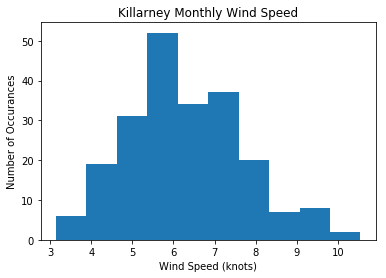

In [6]:
plt.hist(monthly['KIL'])
plt.ylabel('Number of Occurances')
plt.xlabel('Wind Speed (knots)')
plt.title('Killarney Monthly Wind Speed')

#### 3.) The data are a rough normal distribution. For a review of normal distributions see [this Wikipedia link](https://en.wikipedia.org/wiki/Normal_curve). For the sake of this problem, let's assume the data are normally distributed and we can use the properties of normal distributions to find outliers. 

#### As mentioned [here](https://en.wikipedia.org/wiki/1.96) 95% of the data fall within 1.96 standard deviations of the mean. Anything outside of this range we can consider an 'outlier'. In other words, values outside of this range are extreme events (unusually high or lower values)


#### 3a.) Find the standard deviation of the Killarney wind data

In [7]:
std=monthly['KIL'].std()
print(std)

1.3896816958343987


#### 3b.) Use the standard deviation to find all outliers. Hint: look back over our Chipotle filtering example

In [8]:
upper = monthly['KIL'].mean()+(1.96*std)
lower = monthly['KIL'].mean()-(1.96*std)
outliers = monthly[ (monthly['KIL'] > upper) | (monthly['KIL'] < lower) ]

#### 3c.) How many outliers are there?

In [9]:
outliers.shape

(13, 1)

#### 3d.) How extreme were the outliers at Killarney? Print out the average Killarney wind speed and use the max() and min() functions on the outliers to find the maximum and minimum speeds

In [10]:
print('Killarney average: ', monthly['KIL'].mean())
print('Killarney maximimum: ', outliers.max())
print('Killarney minimum: ', outliers.min())

Killarney average:  6.310611701057769
Killarney maximimum:  KIL    10.549355
dtype: float64
Killarney minimum:  KIL    3.142258
dtype: float64


#### 4.) In Homework 1 we wrote a cannon ball launcher simulation. We started with an initial velocity of 10 m/s and incremented that initial velocity by 0.25 m/s until we found an initial velocity that got our cannon ball to 70 meters. If we printed out the initial velocity and distance at each step we'd get the following table.

| Initial Velocity (m/s)       | Distance (meters) |
| ------------- |:-------------:| 
| 10.00 | 12.3 |
| 10.25 | 12.6 |
| 10.50 | 12.9 |
| 10.75 |14.0 |
| 11.00 |14.3 |
| 11.25 | 14.7 |
| 11.50 | 15.0 |
| 11.75 | 16.2 |
| 12.00 | 16.5 |
| 12.25 | 16.9 |
| 12.50 | 18.2 |
| 12.75 | 18.6 |
| 13.00 | 18.9 |
| 13.25 | 19.3 |
| 13.50 | 20.7 |
| 13.75 | 21.1 |
| 14.00 | 21.4 |
| 14.25 | 22.9 |
| 14.50 | 23.3 |
| 14.75 | 23.7 |
| 15.00 | 25.3 |
| 15.25 | 25.7 |
| 15.50 | 26.1 |
| 15.75 | 27.7 |
| 16.00 | 28.2 |
| 16.25 | 28.6 |
| 16.50 | 29.1 |
| 16.75 | 30.8 |
| 17.00 | 31.3 |
| 17.25 | 31.7 |
| 17.50 | 33.5 |
| 17.75 | 34.0 |
| 18.00 | 34.5 |
| 18.25 | 36.3 |
| 18.50 | 36.8 |
| 18.75 | 37.3 |
| 19.00 | 39.3 |
| 19.25 | 39.8 |
| 19.50 | 40.3 |
| 19.75 | 42.4 |
| 20.00 | 42.9 |
| 20.25 | 43.4 |
| 20.50 | 44.0 |
| 20.75 | 46.1 |
| 21.00 | 46.7 |
| 21.25 | 47.2 |
| 21.50 | 49.4 |
| 21.75 | 50.0 |
| 22.00 | 50.6 |
| 22.25 | 52.8 |
| 22.50 | 53.4 |
| 22.75 | 54.0 |
| 23.00 | 56.4 |
| 23.25 | 57.0 |
| 23.50 | 57.6 |
| 23.75 | 60.0 |
| 24.00 | 60.7 |
| 24.25 | 61.3 |
| 24.50 | 63.8 |
| 24.75 | 64.5 |
| 25.00 | 65.1 |
| 25.25 | 67.7 |
| 25.50 | 68.4 |
| 25.75 | 69.0 |
| 26.00 | 69.7 |
| 26.25 | 72.4 |

#### Up to this point we've read data into Pandas from files. Here is an example of how we can use the above table to manually create a Pandas table (what Pandas calls a Data Frame). We'll name our table 'cb', short for cannon ball

In [11]:
cb = {
        'initial_velocity': [10.0,10.25,10.5,10.75,11.0,11.25,11.5,11.75,12.0,12.25,
                             12.5,12.75,13.0,13.25,13.5,13.75,14.0,14.25,14.5,14.75,
                             15.0,15.25,15.5,15.75,16.0,16.25,16.5,16.75,17.0,17.25,
                             17.5,17.75,18.0,18.25,18.5,18.75,19.0,19.25,19.5,19.75,
                             20.0,20.25,20.5,20.75,21.0,21.25,21.5,21.75,22.0,22.25,
                             22.5,22.75,23.0,23.25,23.5,23.75,24.0,24.25,24.5,24.75,
                             25.0,25.25,25.5,25.75,26.0,26.25],
        'distance': [12.26,12.56,12.87,14.00,14.33,14.65,14.98,16.20,16.55,16.89,
                     18.19,18.56,18.92,19.29,20.68,21.07,21.45,22.92,23.33,23.73,
                     25.28,25.70,26.12,27.75,28.19,28.63,29.07,30.79,31.25,31.71,
                     33.51,33.99,34.47,36.35,36.85,37.34,39.30,39.82,40.33,42.36,
                     42.90,43.43,43.97,46.10,46.65,47.21,49.41,49.98,50.56,52.84,
                     53.43,54.03,56.38,56.99,57.61,60.04,60.67,61.30,63.81,64.46,
                     65.11,67.70,68.37,69.04,69.71,72.39]
    }

#### 4a.) We now have a table with two columns - 'initial_velocity' and 'distance'. Use this table to plot distance (x-axis) vs. initial velocity (y-axis)

Text(0.5,1,'Cannon Ball Launcher')

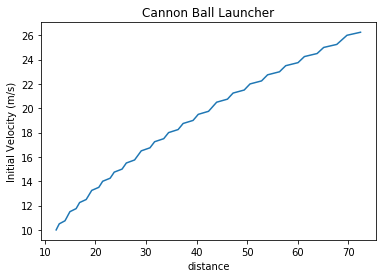

In [12]:
plt.plot(cb['distance'],cb['initial_velocity'])
plt.ylabel('Initial Velocity (m/s)')
plt.xlabel('distance')
plt.title('Cannon Ball Launcher')

#### 4b.) Copy and paste the cannon ball code here. Update the code to do the following:
1. Change the step size to increase the initial velocity by 0.01 m/s after each iteration  
2. Create two empty lists vels and dist to store the initial velocity and distance at each step  
3. After each iteration of the loop add the current initial velocity and distance to the lists

In [13]:
import math

# lists to hold our values
vels = [] # initial velocities
dist = [] # distances

# we could continue to use input statements, but since we know
# the initial conditions we'll just type them here to save 
# ourselves some typing each time the program runs
angle = 40.0 # 40 degrees
h0 = 1.5 # 1.5 meters
time = 0.1 # tenth of a second

# set our starting velocity value
vel = 10.0 # 10 m/s

# also need to set an initial xpos to 
# initialize our loop
xpos = 0.0
ypos = h0

# loop until we reach our desired distance
while xpos < 70.0:
    
    # reset x anx y pos
    # this is redundant for the first time through
    # but nessecary for each time after that
    xpos = 0.0
    ypos = h0
    
    # Convert the angle from degrees to radians. 
    # Use Python's math library to compute the x and y velocities.
    theta = math.pi * angle / 180.0
    xvel = vel * math.cos(theta)
    yvel = vel * math.sin(theta)

    # Use a while loop to continually update the positions 
    # and y-velocity until the cannon ball hits the ground
    while ypos > 0:
        xpos = xpos + time * xvel
        yvel1 = yvel - time * 9.8
        ypos = ypos + time * (yvel + yvel1)/2.0
        yvel = yvel1
    
    vels.append(vel)
    dist.append(xpos)

    # increment our velocity by 1 m/s
    # this is short-hand Python for vel = vel + 1
    vel += 0.01

#### 4c.) Create a plot showing distance (x-axis) vs. velocity (y-axis). This time, plot the data from the cb table (where the step size was 0.25 m/s) and on top of that also plot the new distance/velocity data from above (where the step size is 0.01 m/s). Add a legend so we know which color corresponds to which data.

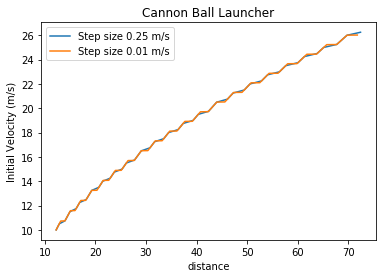

In [14]:
plt.plot(cb['distance'],cb['initial_velocity'])
plt.plot(dist,vels)
plt.ylabel('Initial Velocity (m/s)')
plt.xlabel('distance')
plt.title('Cannon Ball Launcher')
plt.legend(['Step size 0.25 m/s','Step size 0.01 m/s'])

#### 4d.) Print out the last distance value for BOTH datasets (0.25 and 0.01 m/s step sizes)

In [15]:
print("With step size 0.25 m/s:", cb['distance'][-1])
print("With step size 0.01 m/s:", dist[-1])

With step size 0.25 m/s: 72.39
With step size 0.01 m/s: 71.75691507584487


#### 4e.) The xlim and ylim commands can be used to set the x-range and y-range of the plot, respectively. They each take two inputs - the beginning and the end of the range. For example, if we only wanted to show the x-axis (distance) from 10 meters to 20 meters we would use the command plt.xlim(10,20). Repeat 4d, but this time set the x-range to [65,73] and the y-range to [24.5,27]

(24.5, 27)

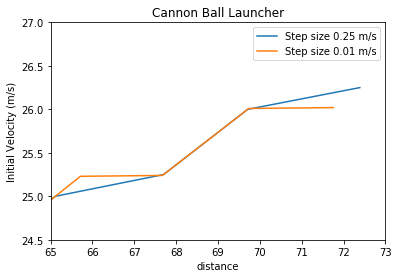

In [16]:
plt.plot(cb['distance'],cb['initial_velocity'])
plt.plot(dist,vels)
plt.ylabel('Initial Velocity (m/s)')
plt.xlabel('distance')
plt.title('Cannon Ball Launcher')
plt.legend(['Step size 0.25 m/s','Step size 0.01 m/s'])
plt.xlim(65,73)
plt.ylim(24.5,27)

#### 5.) We can see in the plot that we actually get close to our desired distance of 70 meters around 26 m/s initial velocity and then we overshoot it and end up at 72m. A common technique in scientific computing is to use a threshold instead of an actual value. Copy and paste the cannon ball code here. Edit the while loop so that instead of saying stop when xpos >= 70, stop when xpos within 1% of our desired target distance (70m)

In [22]:
import math

# we could continue to use input statements, but since we know
# the initial conditions we'll just type them here to save 
# ourselves some typing each time the program runs
angle = 40.0 # 40 degrees
h0 = 1.5 # 1.5 meters
time = 0.1 # tenth of a second

# desired distance and threshold
dd = 70.0 # we'd like to get close to 70 meters
lower = dd - (dd*0.01)
upper = dd + (dd*0.01)

# set our starting velocity value
vel = 10.0 # 10 m/s

# also need to set an initial xpos to 
# initialize our loop
xpos = 0.0
ypos = h0

# loop until we reach our desired distance
while ( (xpos < lower) and not(xpos > upper) ):
    
    # reset x anx y pos
    # this is redundant for the first time through
    # but nessecary for each time after that
    xpos = 0.0
    ypos = h0
    
    # Convert the angle from degrees to radians. 
    # Use Python's math library to compute the x and y velocities.
    theta = math.pi * angle / 180.0
    xvel = vel * math.cos(theta)
    yvel = vel * math.sin(theta)

    # Use a while loop to continually update the positions 
    # and y-velocity until the cannon ball hits the ground
    while ypos > 0:
        xpos = xpos + time * xvel
        yvel1 = yvel - time * 9.8
        ypos = ypos + time * (yvel + yvel1)/2.0
        yvel = yvel1

    # increment our velocity by 1 m/s
    # this is short-hand Python for vel = vel + 1
    vel += 0.01
    
print('Using a threshold instead of an actual value we stop at')
print('Velocity %0.2f m/s and distance %0.2f m' % (vel, xpos))

Using a threshold instead of an actual value we stop at
Velocity 25.86 m/s and distance 69.31 m
